# Homework 2: Integration at Work
Physics 177, Spring 2017  (Prof. Tanedo)  
**Due**: Tuesday, April 25

Everardo Molina  

<span style="color:red">**Revised** (April 23): Fixed: problem numbering. *I've been informed that some students feel that this homework is too much work. I am reducing the homework from the original, please see the notes in red below.*</span>  

<span style="color:blue">
The revisions are as follows:  
**Problem 1.** You may write `integrate_HW` using the trapezoidal rule instead of Simpson's rule.  
**Problem 2.** Only parts A and B are required.  
**Problem 3.** Now completely optional.  
**Problem 4.** Unchanged.
</span>

<span style="color:blue">
**Important**: For any of the optional problems that you choose to skip, you **must** explicitly explain why you were unable to complete the problem. For example, "I tried to code up Simpson's rule but I could not figure out how to have the loop treat odd and even steps differently." If you just write, "*It was too hard,*" then you will lose points (and probably self-respect).
</span>



## 1. Simpson's Rule, Again

<span style="color:red">**Revised** (April 23): you may chose to do this using the trapezoidal rule. If you do, please explain why you were unable to code Simpson's rule.</span>

Write another integrator function using **Simpson's rule**. You may adapt your code from Homework 1. The integrator should take the following arguments:
* A function, $f$
* Two real numbers giving the limits of integration, $a$ and $b$
* The number of steps $N$ to sample

This differs from Homework 1, where you specified the $\Delta x$ rather than $N$. There are different ways of implementing Simpson's rule. Here's one example from (5.9) of Newman's *Computational Physics*:

$\displaystyle I(a,b) = \frac{1}{3}\Delta x\left[ f(a) + f(b) + 4 \sum_{k \text{ odd}}^{N-1} f(a+k\Delta x) + 2 \sum_{k \text{ even}}^{N-2} f(a+k\Delta x) \right]$ ,

where the step size is $\Delta x = (b-a)/N$.

You can fill in the following function stub:

In [1]:
"""def integrate_HW2(f,a,b,N):
    """
    Integrate f from a to b using Simpson's rule with N steps
    """
    Deltax = float (b-a)/N
    Total = (1/2)*f(a)+(1/2)*f(b)
    for i in range(1,N):
        Total += f(a+i*Deltax)
    Total *= Deltax
    
    
    
    # Your code goes here!
    
    return Total # change this!"""

IndentationError: unexpected indent (<ipython-input-1-d2f19d85d64b>, line 3)

In [2]:
def integrate_HW2(f,a,b,N):
    """
    Integrate f from a to b using Simpson's rule with N steps
    """
    Deltax =  (b-a)/N
    Total = f(a)+f(b)
    for i in range(0,N):
        if i%2 != 0:
            Total += 4*f(a+i*Deltax)
  
    
    for i in range (0,N-1):
        if i%2 ==0:
            Total += 2*f(a+i*Deltax)
    
    
    
    # Your code goes here!
    
    return (1/3)*Deltax*Total # change this!

In [3]:
def test_function2(x):
    return 3.0*x**2

integrate_HW2(test_function2,0,1,1000)

0.9999999999999997

Now test this on a nice function:

In [4]:
def test_function(x):
    return 4.0*x**3

integrate_HW2(test_function,0,1,100)

1.0000000000000002

## 2. Diffraction Limit of a Telescope
[Adapted from Exercise 5.4 from *Computational Physics* by Newman]

### Discussion
Our ability to resolve detail in astronomical observations is limited by the diffaction of light in our telescopes.  Light from stars can be treated effectively as coming from a point source at infinity. When such light, with wavelength $\lambda$, passes through the circular aperture of a telescope (which we'll assume to have unit radius) and is focused by the telescope in the focal plane, it produces not a single dot, but a circular diffraction patter consisting of a central spot surrounded by a series of concentric rings. The intensity of the light in this diffraction pattern is given by

$\displaystyle I(r) = \left(\frac{J_1(kr)}{kr}\right)^2 \ ,$

where $r$ is the distance in the focal plane from the center of the diffraction pattern, $k = 2\pi/\lambda$ and $J_1(x)$ is a Bessel function. The Bessel functions $J_m(x)$ are given by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

### A. Coding the Bessel function

Write a Python function that calculates the value of $J_m(x)$ using Simpson's rule with $N=1000$ points. 

In [154]:
from math import pi as pi
from math import sin as sin
from math import cos as cos


def J(m,x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """


    # Your code goes here!
    def Bessel_f(a):
        return np.cos(m*a - x*np.sin(a))
    
    
    # Use the integrate_HW2 function from Problem 1
    
    B=integrate_HW2(Bessel_f,0,pi,1000)
    
    return (1/pi)*B

In [6]:
J(1,2)

0.57739147442354

### B. Plotting these Bessel functions
Plot the Bessel functions $J_0$, $J_1$, and $J_2$ from $x=0$ to $x=20$. 

Make sure that you have installed `matplotlib`. You can do this using `pip` at the command line: (`pip` vs `pip3` depends on your installation)  
`pip3 install matplotlib`

Note: if the plot doesn't show up in this notebook, you may need to run  
`%matplotlib inline`
in the notebook

Follow the template at the bottom of https://github.com/Physics177-2017/Lec05-numpyintro/blob/master/Numpy%20Introduction.ipynb

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline 

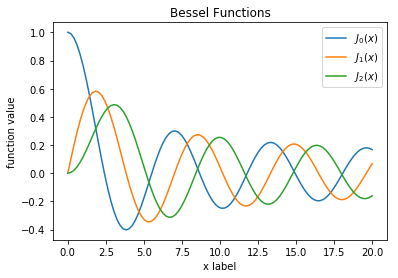

In [17]:
# Create a Numpy array of sampling points
x = np.linspace(0, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)

plt.plot(x,Jnp(0,x) ,label='$J_0(x)$')
plt.plot(x,Jnp(1,x) ,label='$J_1(x)$')
plt.plot(x,Jnp(2,x) ,label='$J_2(x)$')
# FILL IN THE REST
# Make sure to include plot labels

plt.xlabel('x label')
plt.ylabel('function value')

plt.title("Bessel Functions")
plt.legend()
plt.show()

### C. Comparing to Sines

<span style="color:red">**Revised** (April 23): this problem is now optional. If you choose to skip it, explain why you were unable to code these functions and plot them in comparison to the integral expressions.</span>

Over the same range as before, plot $J_0(x)$, $J_1(x)$ (as you did above) and the following functions:

$\displaystyle f_0(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{\pi}{4}\right)$  
$\displaystyle f_1(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{3\pi}{4}\right)$

*Remark*: the more general formula is:  
$\displaystyle f_m(x) = \sqrt{\frac{2}{\pi x}} \cos\left(\pi - \frac{(2m+1)\pi}{4}\right)$,  
this is supposed to be a good approximation of $J_m(x)$ for large $x$.

In [20]:
# No quick start here. 
# Write your own functions f0(x) and f1(x),
# then follow the Problem 2B template to plot f0, f1, J0, and J1

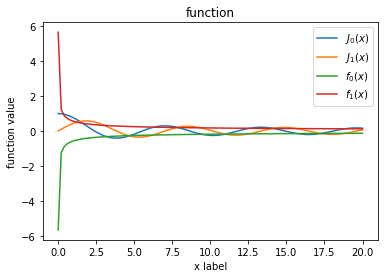

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def F_m(m,x):
    return ((2/(pi*x))**0.5)*cos(pi-((2*m+1)*pi)/4)

x2 = np.linspace(0.01, 20, 100)
                                
Fnp = np.vectorize(F_m)                             
plt.plot(x,Jnp(0,x2) ,label='$J_0(x)$')
plt.plot(x,Jnp(1,x2) ,label='$J_1(x)$')                                
                                
plt.plot(x,Fnp(0,x2),label='$f_0(x)$')
plt.plot(x,Fnp(1,x2),label='$f_1(x)$')

# FILL IN THE REST
# Make sure to include plot labels

plt.xlabel('x label')
plt.ylabel('function value')
plt.title("function")
plt.legend()
plt.show()                                

### D. Plotting Diffraction Patterns

<span style="color:red">**Revised** (April 23): this problem is now optional. If you choose to skip it, explain why you were unable to plot the diffraction pattern following the template provided.</span>

Use the equation for $I(r)$ above to plot the diffraction pattern seen, for example, by a telescope when viewing a point source at the origin. Your plot should look like an **Airy disk**:

![title](https://upload.wikimedia.org/wikipedia/commons/1/14/Airy-pattern.svg)

Image (and discussion) from:
https://en.wikipedia.org/wiki/Airy_disk

For our purposes, use $\lambda = 500~\text{nm}$. Your plot should cover values of $r$ from zero up to $1~\mu\text{m}$. Be careful with units! Numerical functions don't know how to handle units, so you should make sure you're consistent everywhere. I suggest using the Numpy functions **meshgrid** and **pcolormesh**, as demonstrated below.


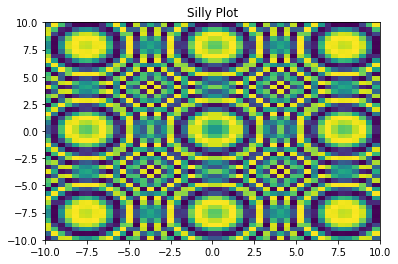

In [14]:
side = np.linspace(-10,10,50)
X,Y = np.meshgrid(side,side)
Z = np.sin(X**2 + Y**2)
plt.pcolormesh(X,Y,Z)
plt.title("Silly Plot")
plt.show()

Try to plot the Airy disk using a variation of the above code, where `Z` is given by $I(r)$, which you have to code in appropriately. 

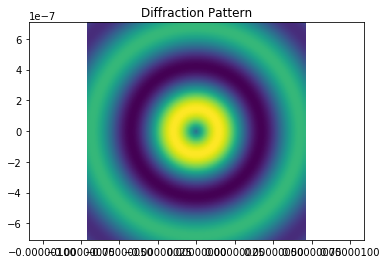

In [157]:
# Your code here!
k = ((2*pi)/(500*10**-9))
side = np.linspace((-1/(2)**(1/2)*10**-6),(1/(2)**(1/2)*10**-6),500)
X,Y = np.meshgrid(side,side)
r = (X**2+Y**2)**0.5
Z = J(1,k*r)
plt.pcolormesh(X,Y,Z)
plt.axis('equal')
plt.title("Diffraction Pattern")
plt.show()






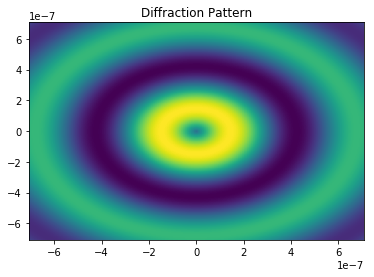

In [158]:
# Your code here!
k = ((2*pi)/(500*10**-9))
side = np.linspace((-1/(2)**(1/2)*10**-6),(1/(2)**(1/2)*10**-6),500)
X,Y = np.meshgrid(side,side)
r = (X**2+Y**2)**0.5
Z = J(1,k*r)
plt.pcolormesh(X,Y,Z)

plt.title("Diffraction Pattern")
plt.show()

You should find something that looks like a Gaussian, but without the diffraction patterns being immediately obvious. This is because the intensity near the center is so much brighter than the intensity of the Airy disks, so the disks are hard to see using the default plot parameters.  

The `vmax` option tells you what the maximum contour value should be; anything above this value will be mapped to the same "large value" color.

In [ ]:
plt.pcolormesh(X,Y,Z, vmax=0.1)
plt.title("Silly Plot")
plt.show()

Play with `vmax` to try to resolve the Airy disks. I got mine to work for `vmax=0.01`.


### X. Extra credit

Refer to the `matplotlib` documentation (or any other resource) to play with the plot options. Change the aspect ratio so that the x- and y- spacings are equal... in other words: make circles look like circles, not ovals. Also play with the color schemes. Can you make a plot that looks like something an astronomer would see (white for areas where there are photons, black for areas where there are no photons). Can you put a plot legend that quantifies the intensity of the plot?

## 3. Gaussian Quadrature

<span style="color:red">**Revised** (April 23): this entire problem is now optional. You still have to explain why you were unable to do it if you choose to skip it.</span>

Download the implementation of **Gaussian Quadrature** from Mark Newman's *Computational Physics* website, or use the copy of `gaussxw.py` included in this GitHub repo. 

A sample program is provided below. Note how the package is called using  
`from gaussxw import gaussxw`  
... this assumes that `gaussxw.py` is in the same directory as this notebook.

Here's how the package works:

In [134]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N=3    # number of steps
a=0.0  # lower limit of integration
b=2.0  # upper limit of integration

x,w = gaussxw(N)
# gaussxw(N) returns the sample points x and weights w
# for the reference integral (-1,1)

# Now define x' and w' to be the sample points and weights
# for the interval (a,b). We derived this transformation
# in lecture 5.
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Now estimate the integral of f by summing
# the sample points and the weights
total = 0.0
for k in range(N):
    total += wp[k]*f(xp[k])
    
print(total)

4.4


To better understand this, actually print the inputs and outputs

In [51]:
print(x)
print(w)

[  7.74596669e-01  -8.96888137e-17  -7.74596669e-01]
[ 0.55555556  0.88888889  0.55555556]


### A. Plotting the weights

<span style="color:red">**Revised** (April 23): if you choose to skip this problem, please explain why it was too difficult.</span>

Create a histogram (or scatter plot) of the sample points and weights that come from the Gaussian quadrature procedure as encoded in `gaussxw`. You should have a plot whose y-axis is the weight, and whose x-axis is the sample position. 

Note: you will have to convert the Python arrays that `gaussxw` outputs into Numpy arrays. You can do this with `np.array(x)` where `x` is a Python array.

Make separate plots for $N = 5, 110, 100$.

In [95]:
# Your code here!

N=5
a=0.0  
b=2.0

w,x = gaussxw(N)
print(w)
print(x)

npw5= np.array(w)
npx5= np.array(x)

[  9.06179846e-01   5.38469310e-01  -8.97547387e-17  -5.38469310e-01
  -9.06179846e-01]
[ 0.23692689  0.47862867  0.56888889  0.47862867  0.23692689]


In [96]:
N=110
a=0.0  
b=2.0

w,x = gaussxw(N)
print(w)
print(x)

npw110= np.array(w)
npx110= np.array(x)

[ 0.99976319  0.99875249  0.99693502  0.99431185  0.99088504  0.98665736
  0.98163221  0.97581366  0.96920641  0.9618158   0.9536478   0.94470902
  0.93500667  0.92454861  0.91334328  0.90139974  0.88872764  0.87533722
  0.86123932  0.84644532  0.83096718  0.81481741  0.79800906  0.78055572
  0.7624715   0.74377101  0.72446936  0.70458217  0.68412549  0.66311587
  0.64157029  0.61950615  0.5969413   0.57389398  0.5503828   0.52642677
  0.50204526  0.47725798  0.45208495  0.42654652  0.40066333  0.37445631
  0.34794663  0.32115573  0.29410525  0.26681706  0.23931321  0.21161594
  0.18374764  0.15573081  0.12758812  0.09934231  0.0710162   0.04263269
  0.01421473 -0.01421473 -0.04263269 -0.0710162  -0.09934231 -0.12758812
 -0.15573081 -0.18374764 -0.21161594 -0.23931321 -0.26681706 -0.29410525
 -0.32115573 -0.34794663 -0.37445631 -0.40066333 -0.42654652 -0.45208495
 -0.47725798 -0.50204526 -0.52642677 -0.5503828  -0.57389398 -0.5969413
 -0.61950615 -0.64157029 -0.66311587 -0.68412549 -0.

In [97]:
N=100
a=0.0  
b=2.0

w,x = gaussxw(N)
print(w)
print(x)

npw100= np.array(w)
npx100= np.array(x)

[ 0.99971373  0.99849195  0.99629513  0.99312494  0.9889844   0.98387754
  0.97780936  0.97078578  0.96281365  0.95390078  0.94405587  0.93328854
  0.9216093   0.90902957  0.89556164  0.88121868  0.86601469  0.84996453
  0.83308388  0.81538924  0.79689789  0.77762791  0.75759812  0.73682809
  0.71533812  0.6931492   0.67028302  0.64676191  0.62260886  0.59784747
  0.57250193  0.54659701  0.52015802  0.49321079  0.46578165  0.4378974
  0.40958529  0.38087298  0.35178853  0.32236034  0.29261719  0.26258812
  0.23230248  0.20178986  0.17108008  0.14020314  0.1091892   0.07806858
  0.04687168  0.01562898 -0.01562898 -0.04687168 -0.07806858 -0.1091892
 -0.14020314 -0.17108008 -0.20178986 -0.23230248 -0.26258812 -0.29261719
 -0.32236034 -0.35178853 -0.38087298 -0.40958529 -0.4378974  -0.46578165
 -0.49321079 -0.52015802 -0.54659701 -0.57250193 -0.59784747 -0.62260886
 -0.64676191 -0.67028302 -0.6931492  -0.71533812 -0.73682809 -0.75759812
 -0.77762791 -0.79689789 -0.81538924 -0.83308388 -0.8

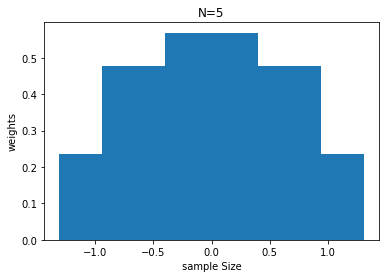

In [119]:

plt.bar(npw5,npx5)

plt.xlabel('sample Size')
plt.ylabel('weights')
plt.title('N=5')
plt.show()

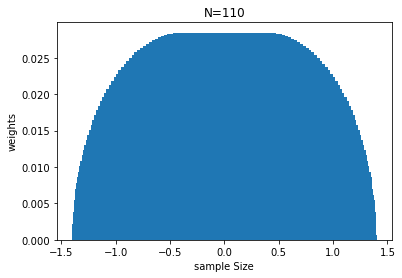

In [123]:

plt.bar(npw110,npx110)

plt.xlabel('sample Size')
plt.ylabel('weights')
plt.title('N=110')
plt.show()

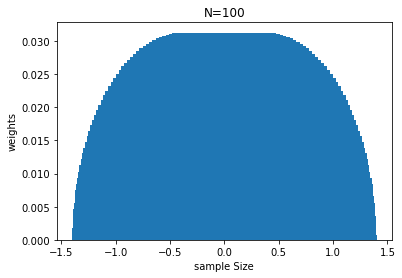

In [121]:

plt.bar(npw100,npx100)

plt.xlabel('sample Size')
plt.ylabel('weights')
plt.title('N=100')
plt.show()

### B. Problems 1A and 1B using Gaussian Quadrature

<span style="color:red">**Revised** (April 23): if you choose to skip this problem, please explain why it was too difficult.</span>

Redo the steps in Problem 1A and Problem 1B using **Gaussian quadrature** rather than Simpson's rule. Use `gaussxw` as shown above. 

In order to do this, you'll need a way a way to get $J_m(x)$ samples. I suggest using the built in "Bessel function of the first kind" function in `scipy`.

You may need to install `scipy` using the following command at the terminal  
`pip3 install scipy`

In [ ]:
from scipy.special import jv as jv  # jv is the J_m from above

print(jv(1,1)) ## compare this with J(1,1) from Problem 1

In [146]:
# Your code here!
# Code the Bessel functions as the integral representation shown above
# ... except now use jv(m,x) to sample the Bessel functions
# ... and focus on the range x in (0,20)
# ... and use Gaussian quadrature to do the integration

# Then plot your Bessel functions, confirm that they match what you got in Problem 1



def G(m,l):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """


    # Your code goes here!
    def Bessel_f(a):
        return cos(m*a - l*sin(a))
    
    
    # Use the integrate_HW2 function from Problem 1
    
    
    
    from gaussxw import gaussxw

    

   
    a=0.0  # lower limit of integration
    b=pi  # upper limit of integration
    
    x,w = gaussxw(N)
    # gaussxw(N) returns the sample points x and weights w
    # for the reference integral (-1,1)

    # Now define x' and w' to be the sample points and weights
    # for the interval (a,b). We derived this transformation
    # in lecture 5.
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    # Now estimate the integral of f by summing
    # the sample points and the weights
    total = 0.0
    for k in range(N):
        total += wp[k]*Bessel_f(xp[k])
    
    
    
    return (1/pi)*total




In [147]:
N = 500
G(1,1)

0.44005058574493333

### X Extra Credit: small sampling

Your Bessel function plots in Problem 1 and 2 should look the same. See what happens if we become "cheap" with our number of samplings. Plot the Bessel functions using Simpsons rule and using Gaussiand quadrature for low values of $N$. 

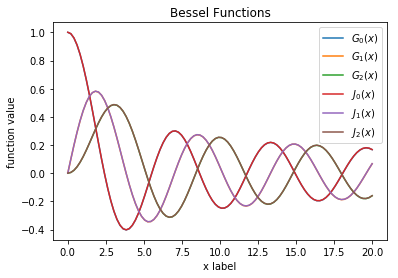

In [151]:

N=500
# Create a Numpy array of sampling points
x = np.linspace(0, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)
Gnp = np.vectorize(G)


plt.plot(x,Gnp(0,x) ,label='$G_0(x)$')
plt.plot(x,Gnp(1,x) ,label='$G_1(x)$')
plt.plot(x,Gnp(2,x) ,label='$G_2(x)$')

plt.plot(x,Jnp(0,x) ,label='$J_0(x)$')
plt.plot(x,Jnp(1,x) ,label='$J_1(x)$')
plt.plot(x,Jnp(2,x) ,label='$J_2(x)$')
# FILL IN THE REST
# Make sure to include plot labels

plt.xlabel('x label')
plt.ylabel('function value')

plt.title("Bessel Functions")
plt.legend()
plt.show()

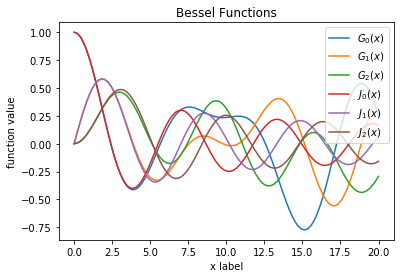

In [152]:

#Extra Credit

N=5
# Create a Numpy array of sampling points
x = np.linspace(0, 20, 100)

# Create a "vectorized" version of J(m,x) that 
# accepts Numpy arrays as arguments
Jnp = np.vectorize(J)
Gnp = np.vectorize(G)


plt.plot(x,Gnp(0,x) ,label='$G_0(x)$')
plt.plot(x,Gnp(1,x) ,label='$G_1(x)$')
plt.plot(x,Gnp(2,x) ,label='$G_2(x)$')

plt.plot(x,Jnp(0,x) ,label='$J_0(x)$')
plt.plot(x,Jnp(1,x) ,label='$J_1(x)$')
plt.plot(x,Jnp(2,x) ,label='$J_2(x)$')
# FILL IN THE REST
# Make sure to include plot labels

plt.xlabel('x label')
plt.ylabel('function value')

plt.title("Bessel Functions")
plt.legend()
plt.show()

## 4. Simpson's Rule Error from HW1

If you did things correctly in HW1, you will have noticed that your errors using Simpsons rule for a function of the form $f(x) = ax^2$ were strange: they were small and didn't scale as you'd expect. 

### A. Explain why

In your own words, explain why this happened. What would you expect from a function of the form $f(x) = ax^3$?

**Hint**: in class we argued that the approximation error using the trapezoidal rule was  
$\displaystyle \epsilon = \frac{1}{12} \delta x^2 \left[ f'(a) - f'(b) \right]$.  


### X. Extra credit

Following Chapter 5.2 of Newman's *Computational Physics*, derive the factor of $1/12$ in the above expression for $\epsilon$. (This derivation is also the lecture 5 notes.) Derive the analogous approximation error for Simpson's rule. It has the form:

$\displaystyle \epsilon = \frac{1}{?} \Delta x^4 \left[ \cdots ? \cdots \right]$ .

*Your answer here*

We got a very small error because simpson's rule approximate the area under a curve using quadratric function as Riemann sums. so when you are approximateing a quadratic function it's a perfect fit. The only error we got was due to python's limitations. The so called "rounding error". We would expect the same thing since a subic function can be divided into two qradratics.


## X Extra Credit: animations

Refer to: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
(Or any other matplotlib animation tutorial)

Make an animated phase-shifted $J_0(x)$, analogous to the phase-shifted sine wave animation at the beginning of the above tutorial.

In [ ]:
# Your work here